# Test the model on the test set

In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from VAE import GaussianVAE

device = "cuda" if torch.cuda.is_available() else 'cpu'

In [29]:
path = 'GaussianVAE.bin'
model = GaussianVAE(784, 2)
model.load_state_dict(torch.load(path))

<All keys matched successfully>

## Test the model on random $\mu$ and $\sigma$

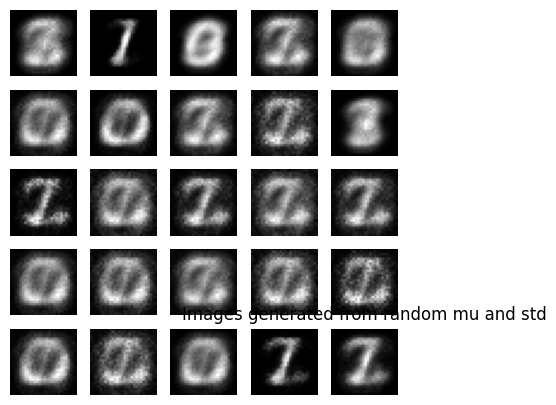

In [30]:
N = 5

fig, ax = plt.subplots(N, N, figsize=(N, N))
for i in range(N):
    for j in range(N):
        mu = torch.randn(1, 2).to(device)
        std = torch.randn(1, 2).to(device).abs()
        reconstructed = model.generate(mu, std).cpu().detach().numpy().reshape(28, 28)
        ax[i][j].imshow(reconstructed, cmap="gray")
        ax[i][j].axis("off")

plt.title("Images generated from random mu and std")
plt.show()

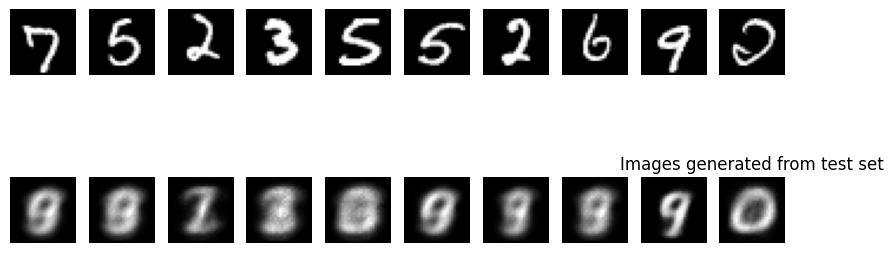

In [31]:
test_mnist = torchvision.datasets.MNIST(
    "./data",
    train=False,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
    ])
)

N = 10

fig, axes = plt.subplots(2, N, figsize=(10, 4))
for i in range(N):
    index = np.random.randint(0, len(test_mnist) - 1)
    original_digit = test_mnist[index][0]

    digit = original_digit.view(1, 28 * 28)
    digit = digit.to(device)

    reconstructed = model(digit)
    reconstructed = reconstructed.cpu().detach().numpy().reshape(28, 28)

    axes[0][i].imshow(original_digit[0], cmap="gray")
    axes[0][i].axis("off")
    axes[1][i].imshow(reconstructed, cmap="gray")
    axes[1][i].axis("off")
plt.title("Images generated from test set", )
plt.show()